In [9]:
%%capture
%matplotlib notebook

try:
    from importlib import reload
except ImportError:
    # assume this is python2
    pass
    
import parse_perf as pf
import parse_log as pl
import plotutils as pu
import pandas as pd
import matplotlib.pyplot as plt

reload(pf)
reload(pl)
reload(pu)

In [10]:
%%capture
# Load the log file and plot memory usages
logs = pl.load_file('logs/mix6/mem/alloc.output')

<IPython.core.display.Javascript object>


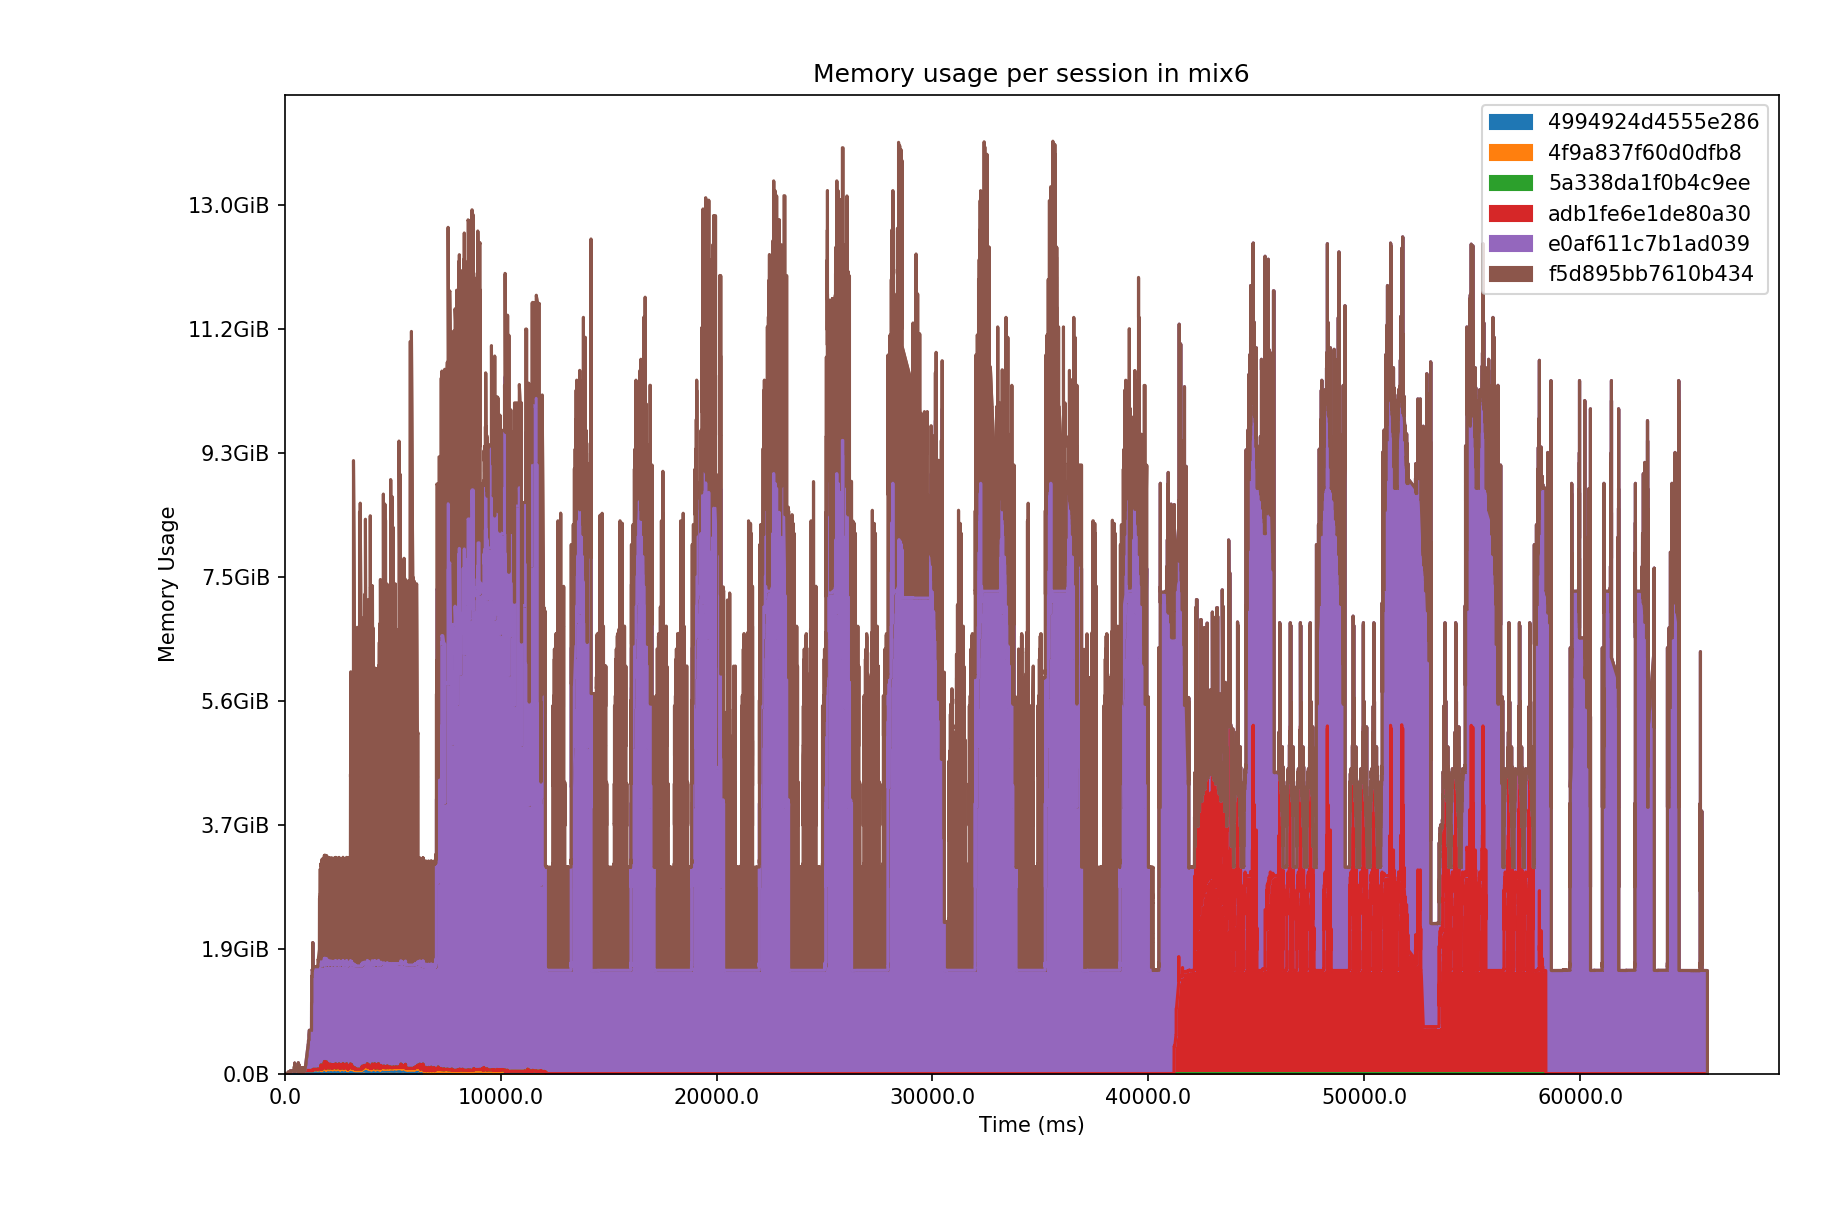

In [12]:
_, _, fig = pl.memory_usage(logs, mem_type='GPU_0_bfc', per_sess=True)
fig.axes[-1].set_title('Memory usage per session in mix6')

In [ ]:
# Load the log file and plot call statistics
logs = pf.load_file('logs/perf.output')
grouped, func = pf.perfcalls(logs)
grouped

Progress counter for mnist50+vgg100

* `1f9a...` (blue): mnist50
* `7a5f...` (orange): vgg100

<IPython.core.display.Javascript object>


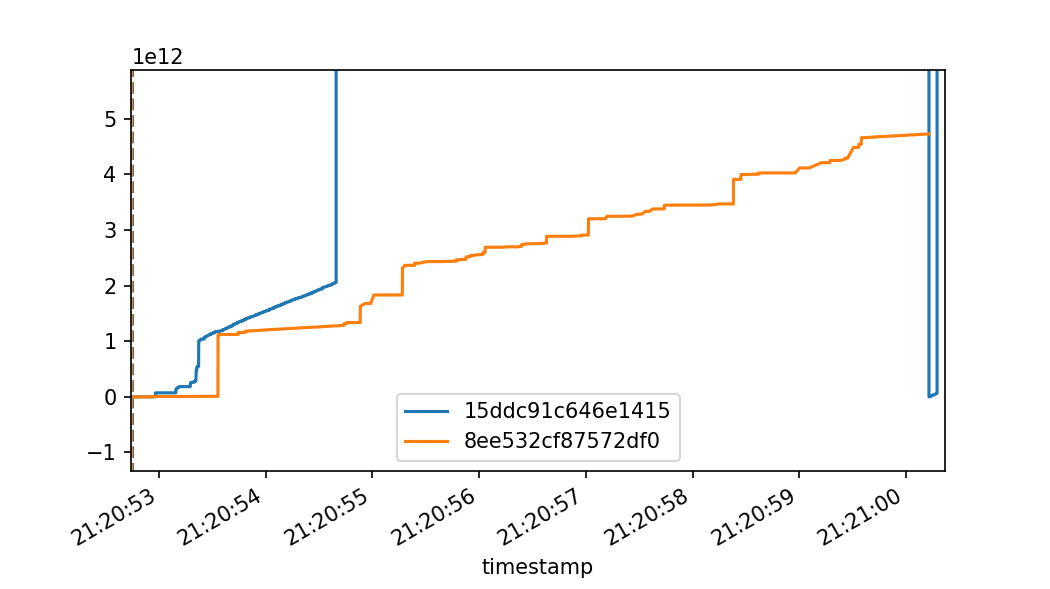

In [6]:
#Load the log file and plot progress counter per session
logs = pl.load_file('logs/mem/mnist50+vgg100/progcounter/progresscounter.output')

df, fig = pl.progress_counter(logs)

Progress counter for 2vgg100

<IPython.core.display.Javascript object>


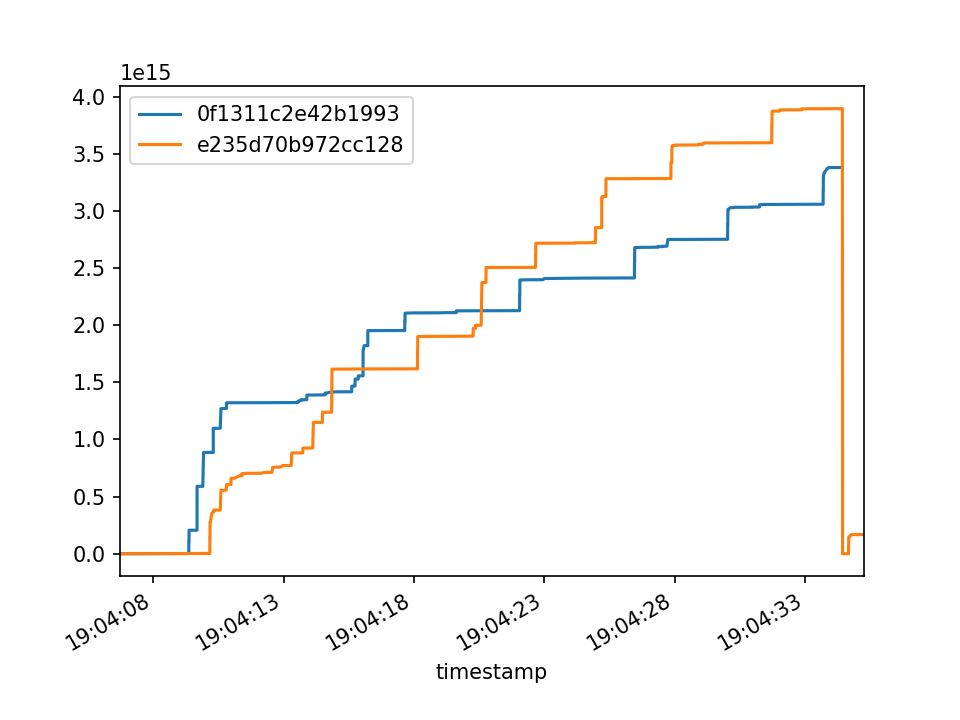

In [29]:
#Load the log file and plot progress counter per session
logs = pl.load_file('logs/progcnt/2vgg100/progresscounter.output')
data = [{'session': l.sess, 'counter': l.cnt, 'timestamp': l.timestamp} for l in logs if l.type == 'prog_cnt']
df = pd.DataFrame(data)
fig, ax = plt.subplots()
for key, grp in df.groupby(['session']):
    ax = grp.plot(ax=ax, kind='line', x='timestamp', y='counter', label=key)

Progress counter for mix6

<IPython.core.display.Javascript object>


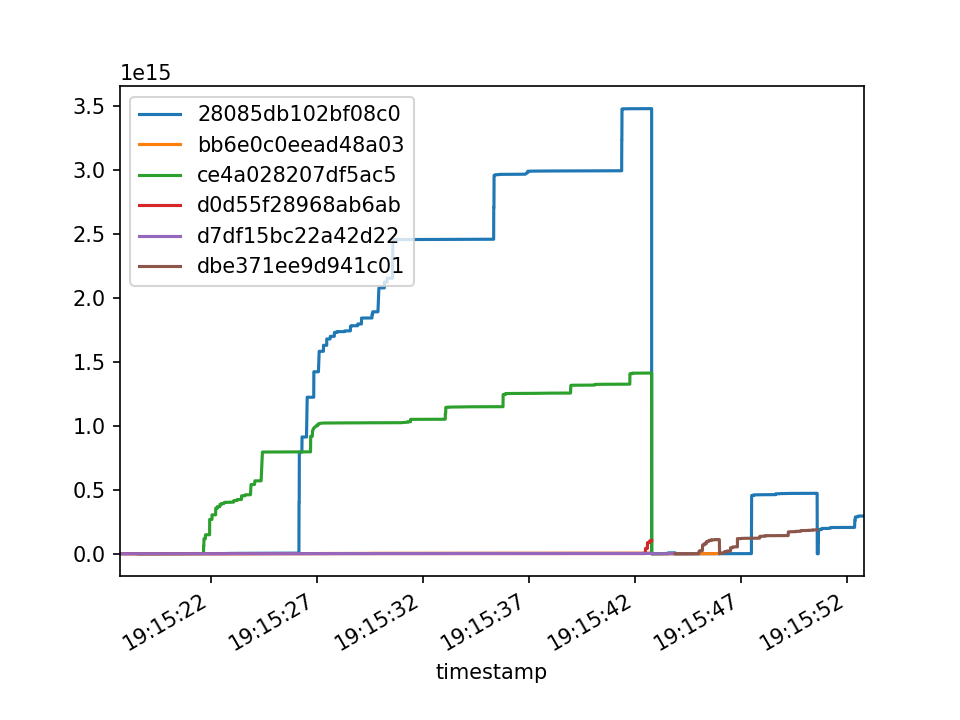

In [30]:
#Load the log file and plot progress counter per session
logs = pl.load_file('logs/mem/mix6/progresscounter.output')

df, fig = pl.progress_counter(logs)